In [1]:
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd

In [17]:
X_train = pd.read_csv("pred_2018.csv")

In [18]:
X_train

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296,6.262531
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945,37.362860
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232,67.924084
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352,93.080531
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885,22.703812
...,...,...,...,...,...,...,...,...,...,...,...,...
2413,2413,20.15456,72.84432,5.199882,4.516778,4.321080,2.658953,5.113997,5.301668,6.419223,5.321604,5.675313
2414,2414,20.15456,72.92394,0.122287,0.126717,0.101494,0.111509,0.121749,0.122467,0.145785,0.120626,0.131842
2415,2415,20.15456,73.00357,0.039415,0.040843,0.032713,0.035941,0.039241,0.039473,0.046989,0.038879,0.043250
2416,2416,20.15456,73.08319,2.719220,1.370163,0.818687,1.205721,1.316443,1.324201,1.576338,1.304297,1.350935


In [5]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]
Sum_of_squared_distances = []
K = range(5,9)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="euclidean",
                          verbose=False,
                          random_state=42)
    
    km = km.fit(X_train)
    y_pred_km = km.predict(X_train)
    Sum_of_squared_distances.append(km.inertia_)
    print("Euclidean silhoutte: {:.2f}".format(silhouette_score(X_train, y_pred_km, metric="euclidean")))

Euclidean silhoutte: 0.20
Euclidean silhoutte: 0.19
Euclidean silhoutte: 0.23
Euclidean silhoutte: 0.23


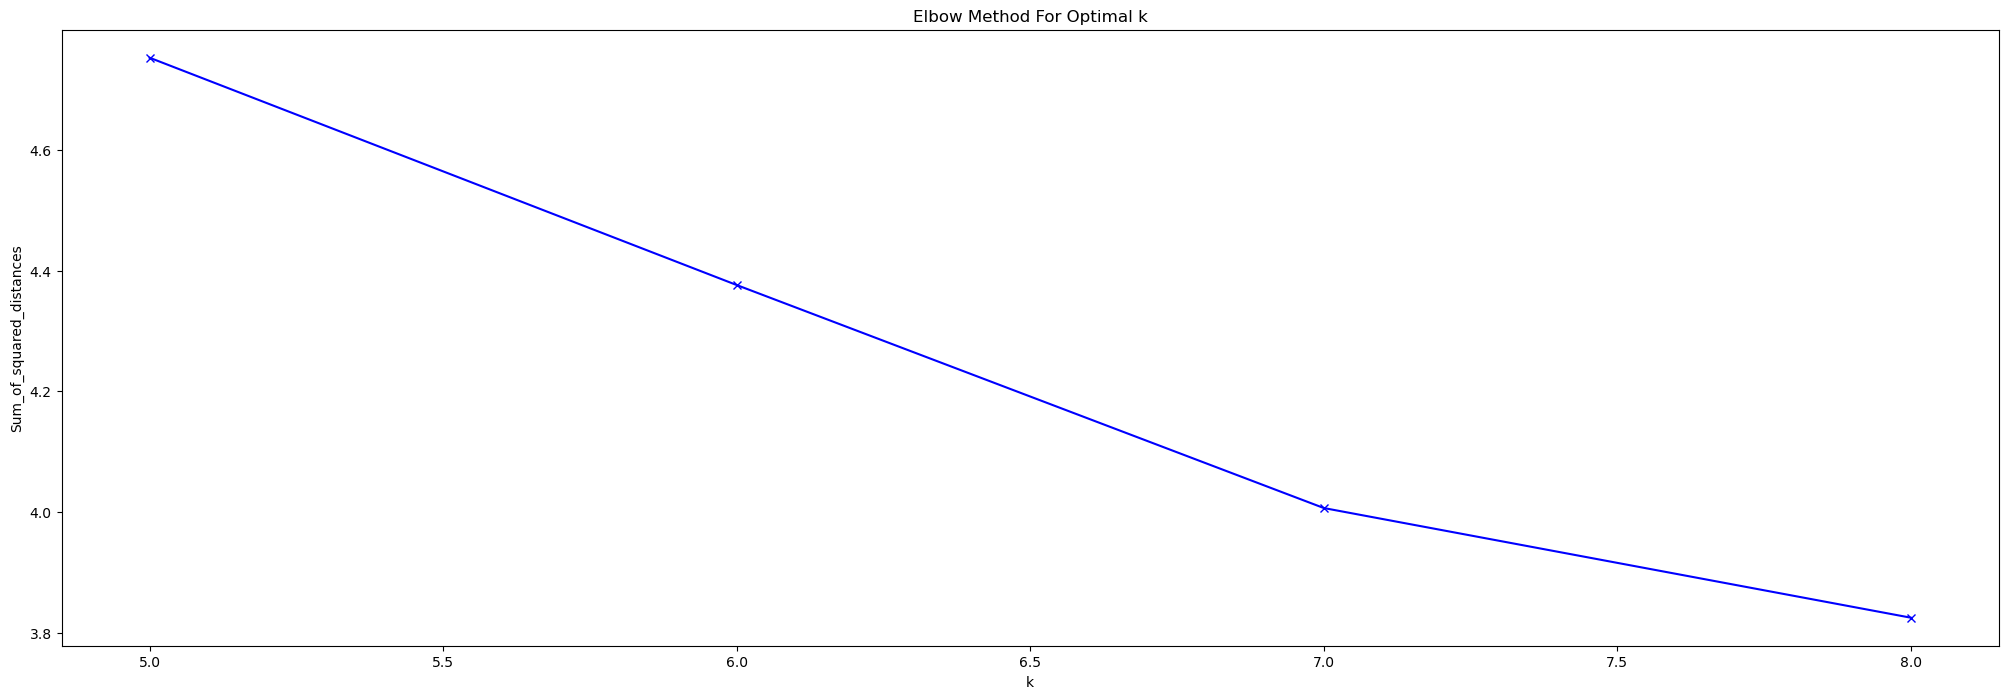

In [6]:
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
data_list = []

In [19]:
def Cluster_data(df,num):
    #Scale data
    
    df_scaled = TimeSeriesScalerMeanVariance().fit_transform(df.iloc[:,3:])
    sz = df_scaled.shape[1]
    
    #Train
    km  = TimeSeriesKMeans(n_clusters= num,
                          n_init=2,
                          metric="euclidean",
                          )
    km = km.fit_predict(df_scaled)
    
    #Add column
    df["Vals"] = list(km)
    
    # Make list
    data_list = []
    for i in range(8):
         data_list.append(df[df["Vals"] == i])
    
    return data_list

In [20]:
data_list = Cluster_data(X_train,8)

In [21]:
[data_list[i].values.shape[0] for i in range(8)]

[406, 152, 204, 484, 151, 334, 408, 279]

C:\Users\Ritesh Bhalerao\AppData\Local\Temp\ipykernel_340\3611955359.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


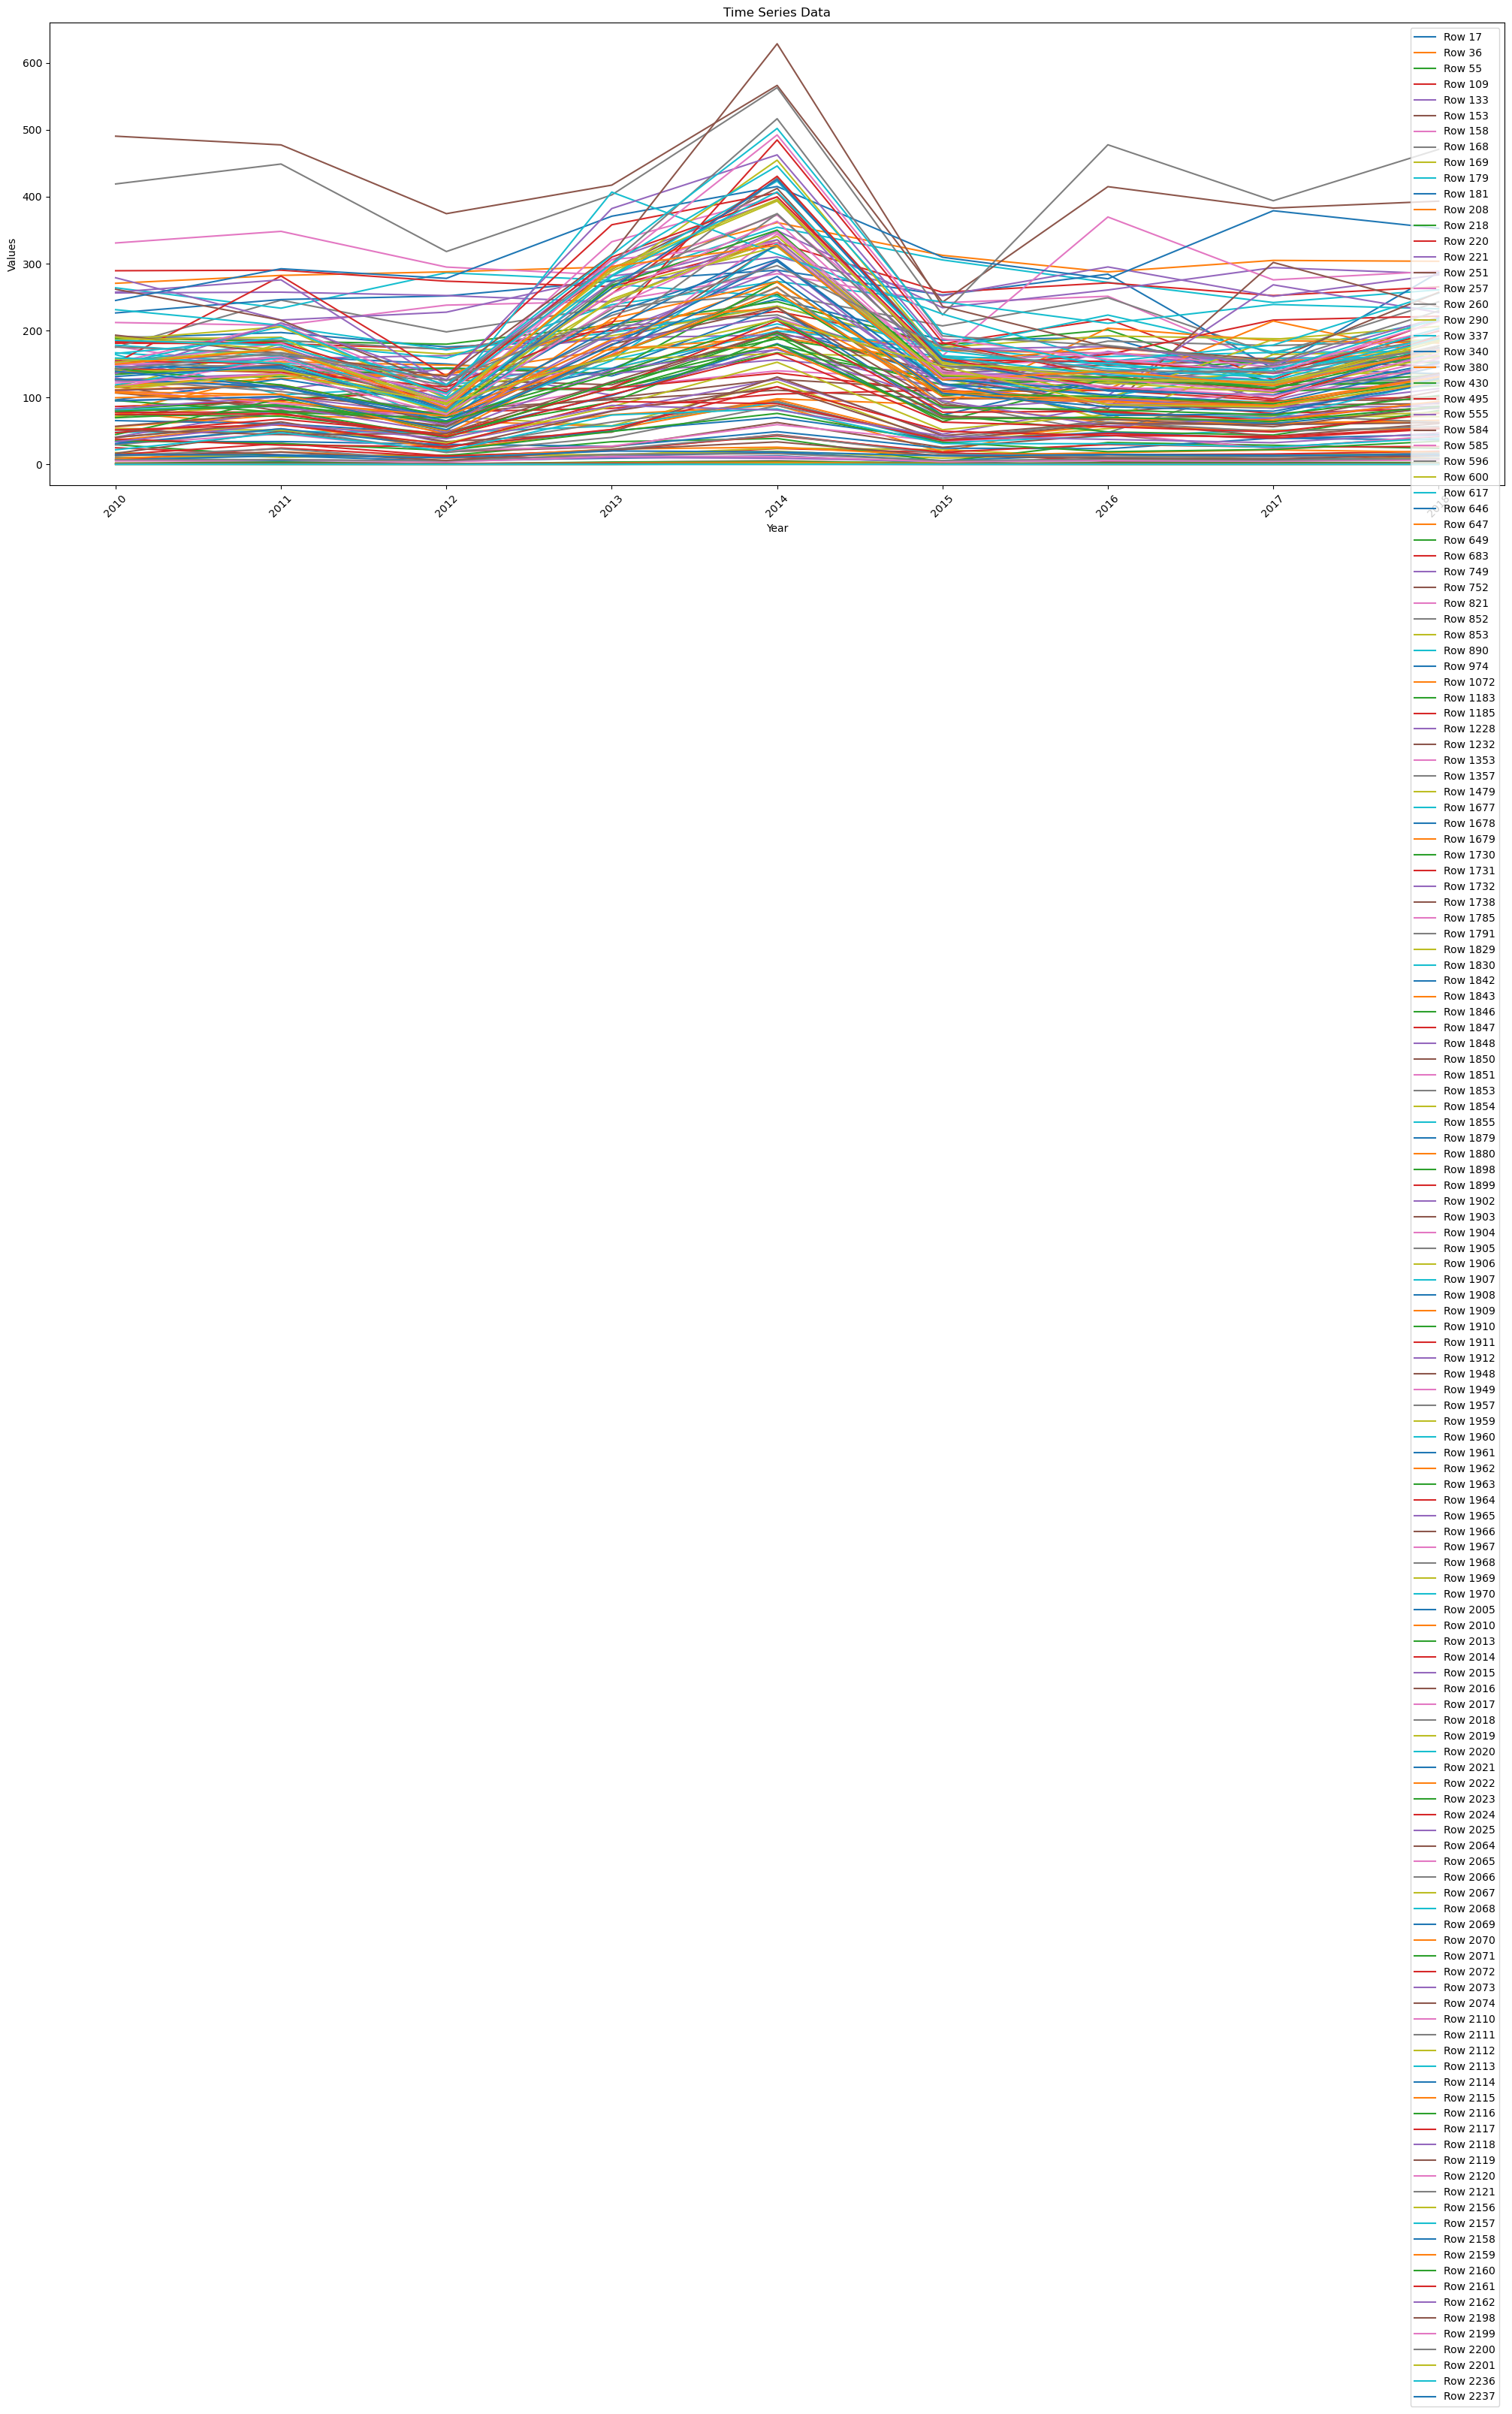

In [27]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Remove the 'Index' column if it's not needed for plotting
df = data_list[4].drop(columns=['Index'])

# Extract years from column names
years = df.columns[2:-1]  # Assuming the year columns start from the third column

# Iterate through rows and create plots
for index, row in df.iterrows():
    plt.plot(years, row[2:-1], label=f'Row {index}')
    
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [29]:
i = 1
for data in data_list :
    data.to_csv(f"Cluster_{i}.csv",index = False)
    i+=1

In [1]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [2]:
!jt -t grade3